In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [2]:
class Kepler(object):
    def __init__(self, mass=1., diff=1.e-5):
        self.mass = mass
        self.diff = diff
        self.xdiff = np.array([self.diff, 0., 0.])
        self.ydiff = np.array([0., self.diff, 0.])
        self.zdiff = np.array([0., 0., self.diff])
        self.ode = ode(self.dwdt)
        self.ode.set_integrator('dopri5') # Runge-Kutta
        return 
    def _diff_central(self, func=None, x=None, dx=None):
        return((func(x + 0.5 * dx) - func(x - 0.5 * dx)) / self.diff)
    def _diff_correct(self, func=None, x=None, dx=None):
        return((4. * self._diff_central(func=func, x=x, dx=dx * 0.5) -
                self._diff_central(func=func, x=x, dx=dx)) / 3.)
    def potential(self, x=None):
        r = np.sqrt(x[0]**2 + x[1]**2 + x[2]**2)
        return - self.mass / r
    def gradient(self, x=None):
        g = np.zeros(3)
        g[0] = self._diff_correct(func=self.potential, x=x, dx=self.xdiff)
        g[1] = self._diff_correct(func=self.potential, x=x, dx=self.ydiff)
        g[2] = self._diff_correct(func=self.potential, x=x, dx=self.zdiff)
        return g
    def dwdt(self, t, w):
        x = w[:3]
        v = w[3:]
        dwdt = np.zeros(6)
        dwdt[:3] = v
        dwdt[3:] = - self.gradient(x=x)
        return(dwdt)
    def integrate(self, w0=None, t0=0., dt=0.1, nt=100):
        self.ode.set_initial_value(w0, t0)
        w = np.zeros((nt, 6))
        t = np.zeros(nt)
        w[0, :] = w0
        t[0]= t0
        for indx in np.arange(nt - 1) + 1:
            t[indx] = t[indx - 1] + dt
            self.ode.integrate(self.ode.t + dt)
            w[indx, :] = self.ode.y
        return(t, w)

In [3]:
kepler = Kepler()

w0 = np.array([1., 0., 1., 0., 0.5, 0.])
(t, w) = kepler.integrate(w0=w0, nt=1000)

<IPython.core.display.Javascript object>


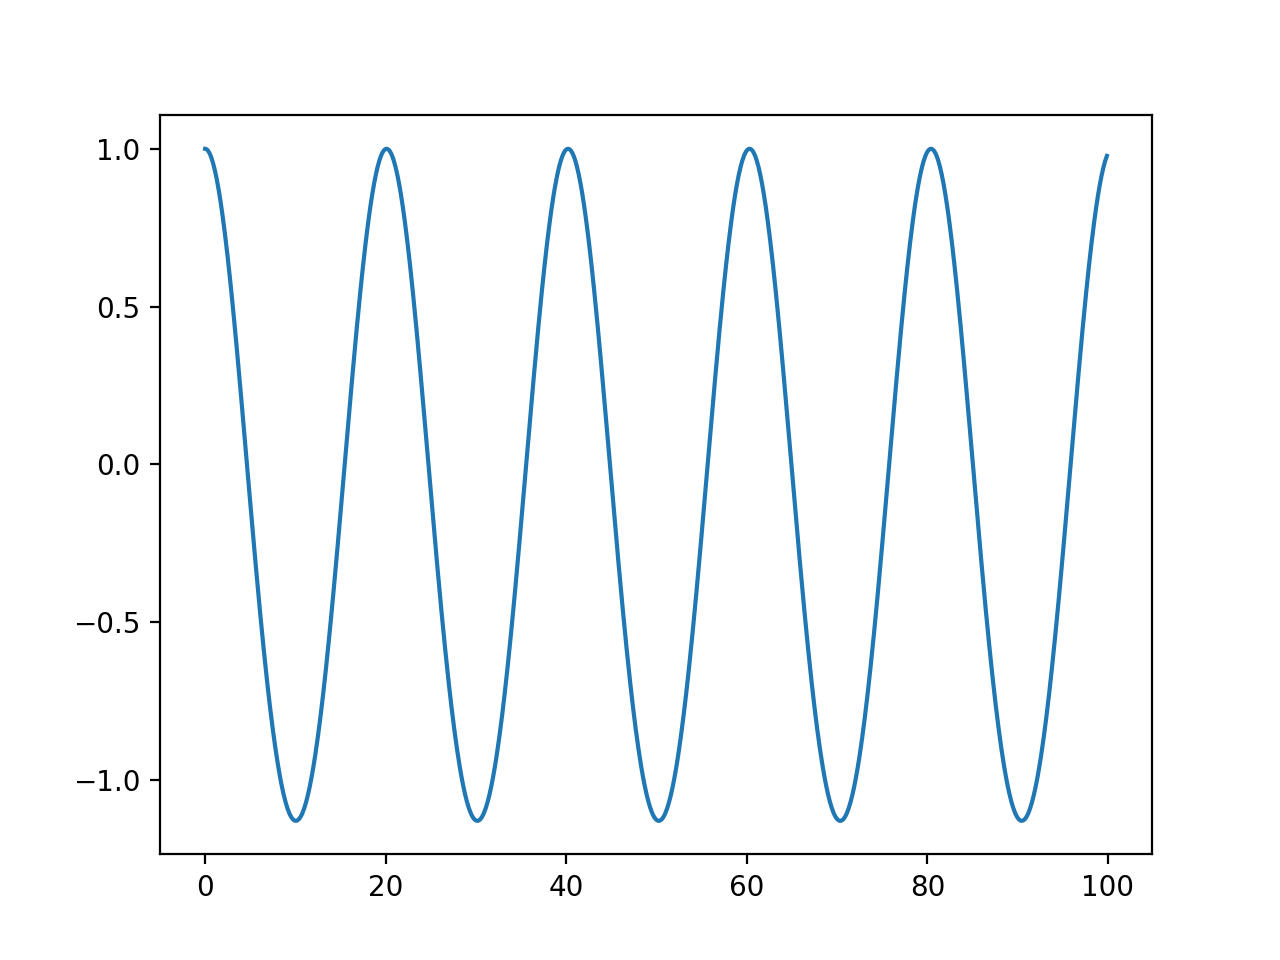

In [4]:
plt.plot(t, w[:, 0])

<IPython.core.display.Javascript object>


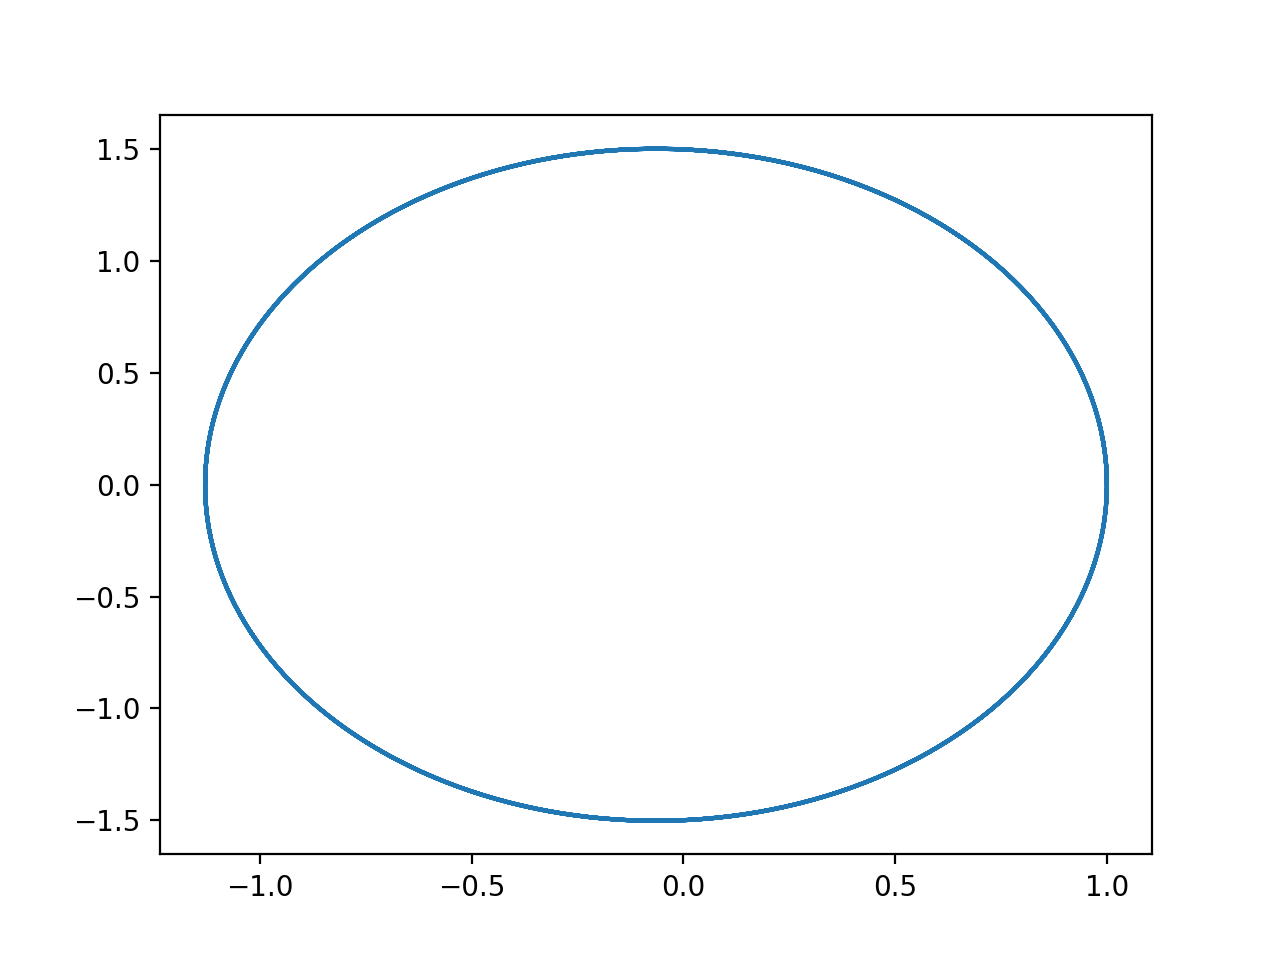

In [5]:
plt.plot(w[:, 0], w[:, 1])

<IPython.core.display.Javascript object>


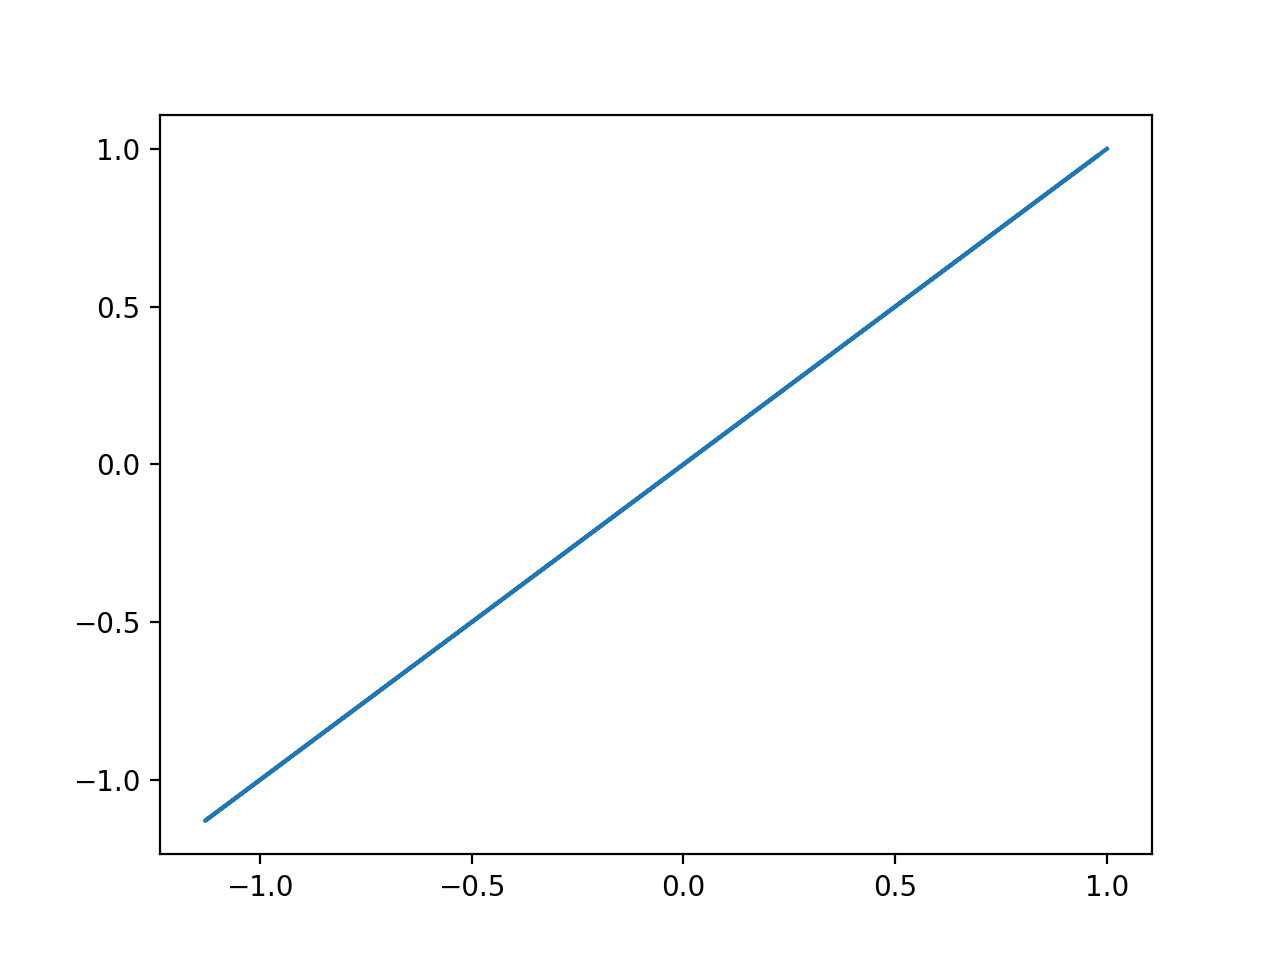

In [6]:
plt.plot(w[:, 0], w[:, 2])

In [7]:
class KeplerBulge(Kepler):
    def potential(self, x=None):
        r = np.sqrt(x[0]**2 + x[1]**2 + x[2]**2)
        r3 = r**3
        return (- self.mass * (1. / r + 0.03 / r3))

In [8]:
bulge = KeplerBulge()

w0 = np.array([1., 0., 0., 0., 0.5, 0.])
(t, w) = bulge.integrate(w0=w0, nt=1000)

<IPython.core.display.Javascript object>


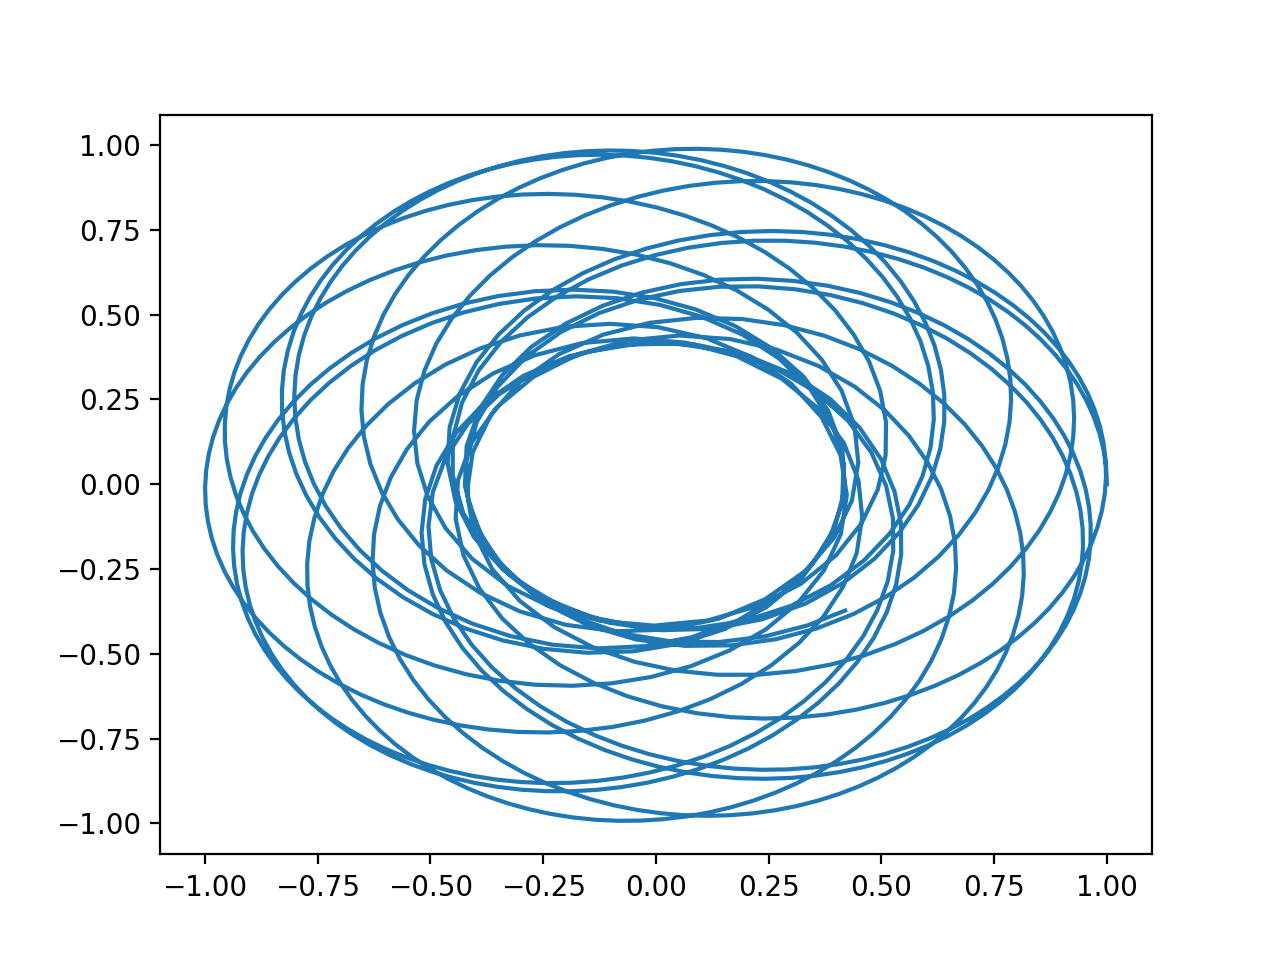

In [9]:
plt.plot(w[:, 0], w[:, 1])

In [10]:
class KeplerAsymmetric(Kepler):
    def potential(self, x=None):
        r = np.sqrt(x[0]**2 + 0.5 * x[1]**2 + x[2]**2)
        return (- self.mass * 1. / r)

In [11]:
asym = KeplerAsymmetric()

w0 = np.array([1., 0., 0., 0., 0.5, 0.])
(t, w) = asym.integrate(w0=w0, nt=10000, dt=0.01)

<IPython.core.display.Javascript object>


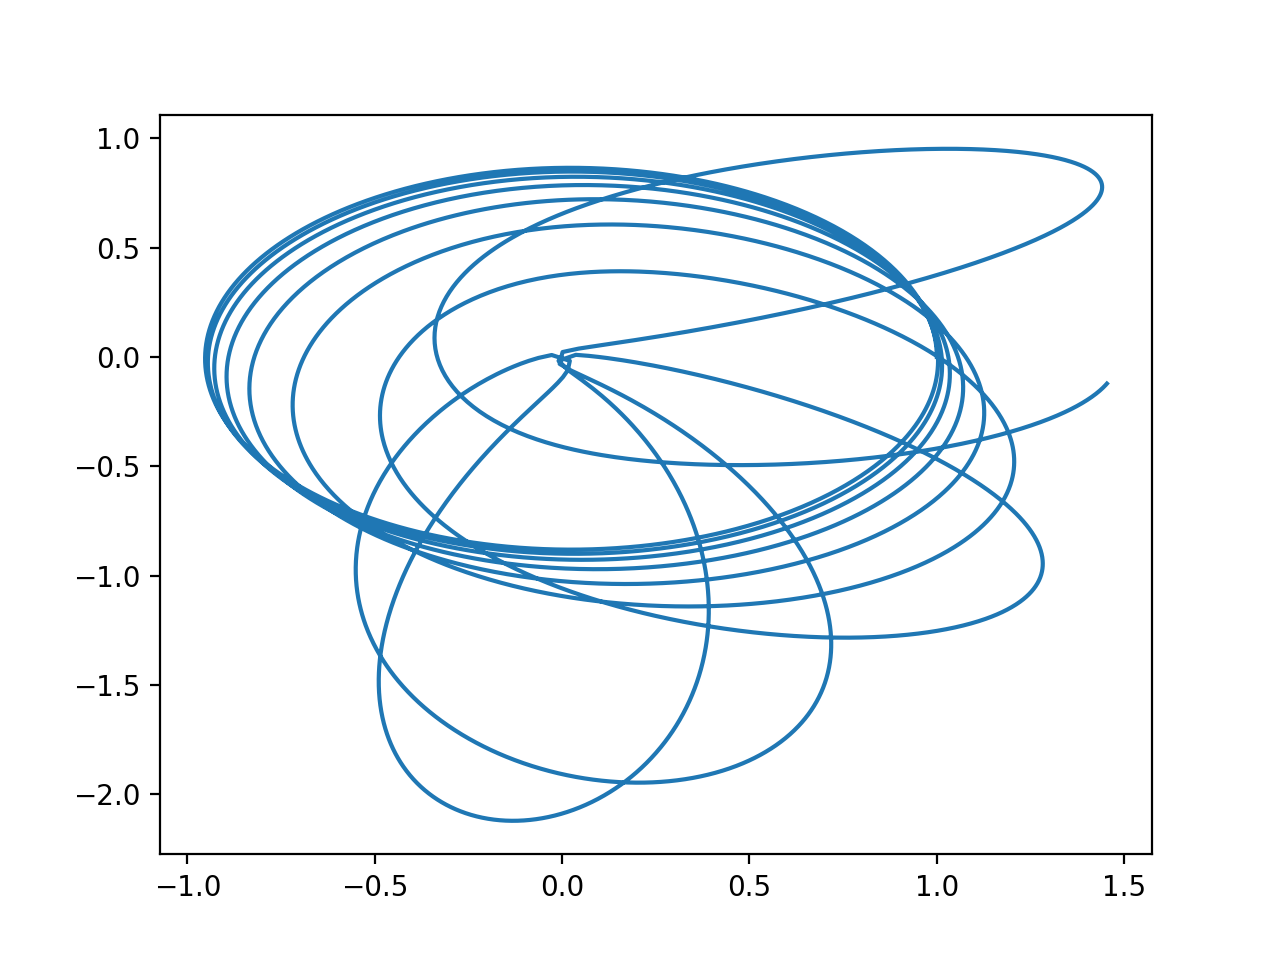

In [12]:
plt.plot(w[:, 0], w[:, 1])